In [1]:
import numpy as np
import sympy as smp
import pandas as pd
from matplotlib import pyplot as plt
from scipy.misc import derivative as dirv

## differentiation

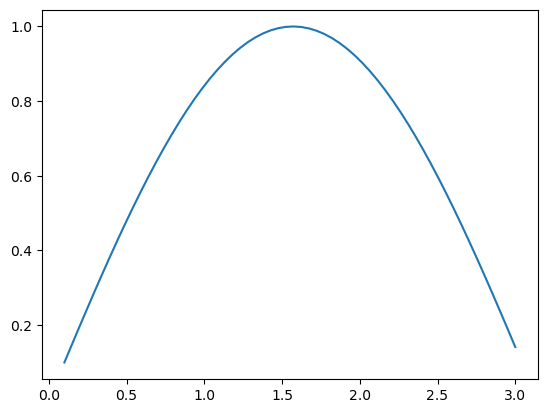

In [36]:
# our function
n = 60
t = np.linspace(0.1,3,n)
x = np.sin(t)
#plot it
plt.plot(t,x)

In [37]:
delX = abs(t[0] - t[1])

diff = np.zeros(np.size(t))
diff[0] = (x[1] - x[0])/(t[1] - t[0])
diff[-1] = (x[-1] - x[-2])/(t[-1] - t[-2])

for i in range(1,t.size-1):
    diff[i] = (x[i+1] - x[i])/(t[i+1] - t[i])


In [38]:
print(diff.size)
print(np.gradient(x).size)

60
60


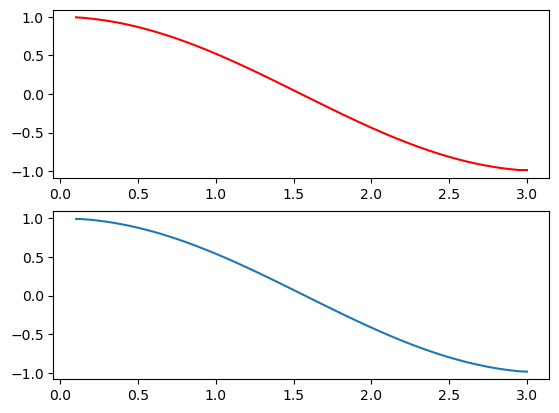

In [39]:
diff = np.array(diff)
fig, ax = plt.subplots(2)
ax[0].plot(t,diff,'r-')
ax[1].plot(t,np.gradient(x,t))

## Noisy

In [61]:
varience = 0.001
SD = np.sqrt(varience)
noise = np.random.normal(0.03, SD, n)

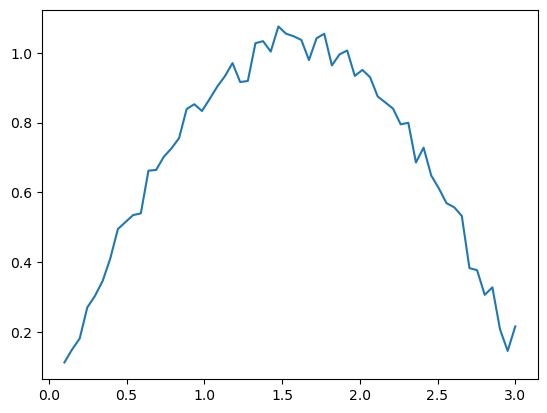

In [62]:
plt.plot(t,x+noise)

In [63]:
filt = np.ones(5)/5
x_smooth = np.convolve(x+noise, filt, mode='valid')

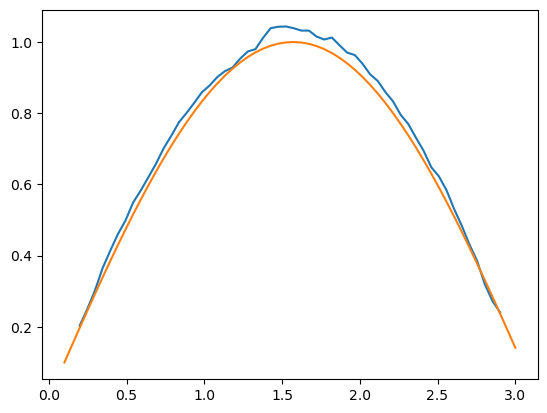

In [64]:
plt.plot(t[2:-2], x_smooth)
plt.plot(t,x)

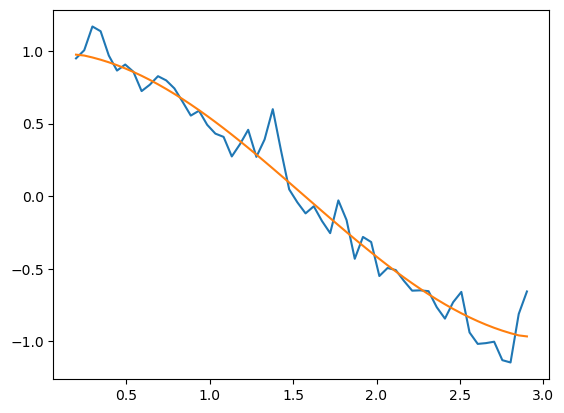

In [66]:
plt.plot(t[2:-2],np.gradient(x_smooth,t[2:-2]))
plt.plot(t[2:-2],np.gradient(x[2:-2],t[2:-2]))

In [59]:
np.convolve?

Signature: np.convolve(a, v, mode='full')
Docstring:
Returns the discrete, linear convolution of two one-dimensional sequences.

The convolution operator is often seen in signal processing, where it
models the effect of a linear time-invariant system on a signal [1]_.  In
probability theory, the sum of two independent random variables is
distributed according to the convolution of their individual
distributions.

If `v` is longer than `a`, the arrays are swapped before computation.

Parameters
----------
a : (N,) array_like
    First one-dimensional input array.
v : (M,) array_like
    Second one-dimensional input array.
mode : {'full', 'valid', 'same'}, optional
    'full':
      By default, mode is 'full'.  This returns the convolution
      at each point of overlap, with an output shape of (N+M-1,). At
      the end-points of the convolution, the signals do not overlap
      completely, and boundary effects may be seen.

    'same':
      Mode 'same' returns output of length ``max(M